In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns 

%matplotlib inline 

iris = sns.load_dataset('iris')
tips = sns.load_dataset('tips')
titanic = sns.load_dataset('titanic')

# Mandatory Assignment 1

This is the second of three mandatory assignments which must be completed during the course. Note that you only need to pass 2 out of 3 assignments to be eligible for the exam.


First some practical information: 

* When is the assignment due?: **23:59, Friday, August 14, 2020.**
* Should i work with my group?: **Yes**. In particular, you should **only hand in 1 assignment per group**.

The assignment consists of problems from some of the exercise sets that you have solved so far. Some exercises are modified a little to better suit the structure of the assignment. 

**Note**: It is important that you submit your edited version of THIS [notebook](https://fileinfo.com/extension/ipynb#:~:text=An%20IPYNB%20file%20is%20a,Python%20language%20and%20their%20data.) as a .ipynb file and nothing else. Do not copy your answers into another notebook that you have made. Do not submit your answers as a pdf. Do not convert the notebook to json and then submit that etc. :) 

## Problems from Exercise Set 3:

> **Ex. 3.2.1:**: Show the first five rows of the titanic dataset. What information is in the dataset? Use a barplot to show the probability of survival for men and women within each passenger class. Can you make a boxplot showing the same information (why/why not?). Write _three sentences_ for this question. 
>
> > _Hint:_ https://seaborn.pydata.org/generated/seaborn.barplot.html, specifically the `hue` option.

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


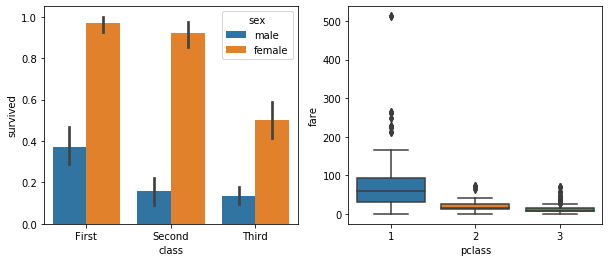

In [2]:
# YOUR CODE HERE
# [Answer to Ex. 3.2.1]
#first five rows.
print(titanic.head(n=5))
#barplot
fig, ax = plt.subplots(1,2, figsize = (10, 4))
#ax.set_xlim([0, 100]), ax.set_ylim([0,.04]) # add axes cutoffs 
sns.barplot(x='class', y='survived', data=titanic, ax=ax[0], hue="sex")
# cannot use a boxplot because it doesn't show density.
#boxplot that looks horrible.
sns.boxplot(x='pclass', y='fare', data=titanic, ax=ax[1])

> **Ex. 3.2.2:** Using the iris flower dataset, draw a scatterplot of sepal length and petal length. Include a second order polynomial fitted to the data. Add a title to the plot and rename the axis labels to `sepal length` and `sepal width`.
> _Write 3 sentences:_ Is this a meaningful way to display the data? What could we do differently?
>
> For a better understanding of the dataset this image might be useful:
> <img src="iris_pic.png" alt="Drawing" style="width: 200px;"/>
>
>> _Hint:_ use the `.regplot` method from seaborn. 

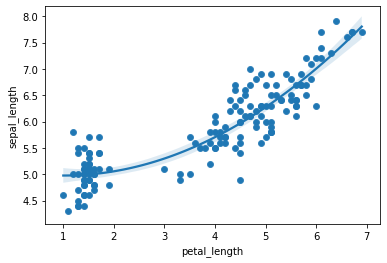

In [4]:
# YOUR CODE HERE
sns.scatterplot('petal_length', 'sepal_length', data=iris)
sns.regplot(x="petal_length", y="sepal_length", data=iris, order=2)

> **Ex. 3.2.3:** Combine the two of the figures you created above into a two-panel figure similar to the one shown here:
> <img src="Example.png" alt="Drawing" style="width: 600px;"/>
>
> Save the figure as a png file in this on your computer named `two_plots.png`. 
>> _Hint:_ See [this question](https://stackoverflow.com/questions/41384040/subplot-for-seaborn-boxplot) on stackoverflow for inspiration.

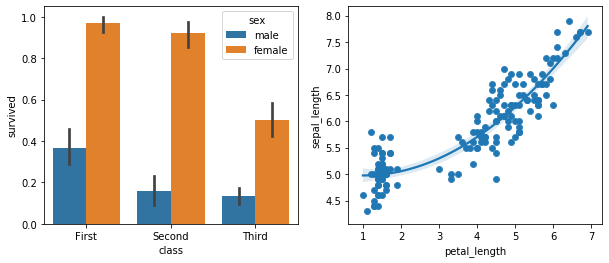

In [5]:
# YOUR CODE HERE
# create fig and ax with 2 subplots
fig, ax = plt.subplots(1,2, figsize = (10, 4))
#ax.set_xlim([0, 100]), ax.set_ylim([0,.04]) # add axes cutoffs 
sns.barplot(x='class', y='survived', data=titanic, ax=ax[0], hue="sex") # left barplot
sns.scatterplot('petal_length', 'sepal_length', data=iris, ax=ax[1]) # right scatterplot
sns.regplot(x="petal_length", y="sepal_length", data=iris, order=2, ax=ax[1]) # reg on right plot

plt.savefig('two_plots.pdf') # save the fig

> **Ex. 3.2.4:** Use [pairplot with hue](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to create a figure that clearly shows how the different species vary across measurements. Change the color palette and remove the shading from the density plots

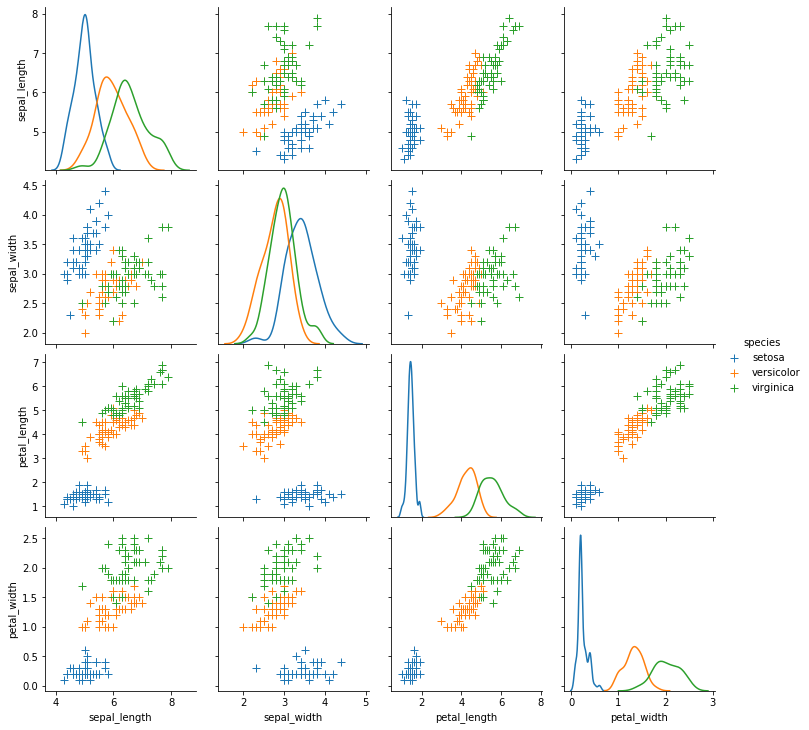

In [7]:
# YOUR CODE HERE
sns.pairplot(iris, hue="species", diag_kind="kde", markers="+",
                 plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                 diag_kws=dict(shade=False)) # make hist and scatter for all

## Problems from Exercise Set 4:

We continue with the exercise that analyzes NOAA data. This time we are going to **read the weather data from a csv file** located in this assignment directory instead of trying to request the website. The file is called `'weather_data_1870-1875.csv'` and consists of weather data for the period 1870-1875. Specifically, the csv file contains a dataframe which has been constructed by concatenating the _non-processed_ data from 1870-1875.

> **Ex. 4.1.1:** The code below runs through some of the steps we completed in exercise 4.1.1 in Module 4. As we are not going to request the website but load the data from a csv file your task is to **rewrite parts of the function**. Rename the function to `process_weather` instead of `load_weather`. The function should now  take a `dataframe` as input. The function should still run through the same processing steps although you should consider whether `df_weather.iloc[:, :4]` is necessary for the weather data loaded from  the csv file. The doc string should also be rewritten. After having rewritten the function, load the weather data from `'weather_data_1870-1875.csv'` into a pandas dataframe, apply the `load_weather` function  to this dataframe and store the result in the variable `df_weather_period`.   

```python
import pandas as pd

def load_weather(year):
    
    '''
    This functions loads the data for selected year and then structures and cleans it.
    - Structuring includes removing unused columns, renaming and selecting only observations 
    of maximum temperature. 
    - Cleaning includes inserting missing decimal, sorting and resetting index.
    '''
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"
    
    # loads the data
    df_weather = pd.read_csv(url, header=None)\
                    .iloc[:,:4] 
    
    # structure and clean data using methods chaining
    # note that the original columns now are strings when loading the csv file
    # and not integers as when downloading the data
    df_out = \
        df_weather\
            .rename(columns={'0': 'station', '1': 'datetime', '2': 'obs_type', '3': 'obs_value'})\
            .query("obs_type == 'TMAX'")\
            .assign(obs_value=lambda df: df['obs_value']/10)\
            .sort_values(by=['station', 'datetime'])\
            .reset_index(drop=True)\
            .copy() 

    # area process
    df_out['area'] = df_out['station'].str[0:2]
    
    # datetime process
    df_out['datetime_dt'] = pd.to_datetime(df_out['datetime'], format = '%Y%m%d')
    df_out['month'] = df_out['datetime_dt'].dt.month
    df_out['year'] = df_out['datetime_dt'].dt.year
    
    return df_out
```

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert any(df_weather_period.station == process_weather(pd.read_csv('weather_data_1870-1875.csv')).station)
assert any(df_weather_period.columns.values == ['station', 'datetime', 'obs_type', 'area', 
                                                'obs_value', 'datetime_dt', 'month', 'year'])
assert len(df_weather_period) == 132317
assert round(df_weather_period.obs_value.mean()) == 14

> **Ex. 4.1.1.1 (Not seen in module 4):** Try to plot the observations value of `df_weather_period` by running `df_weather_period.obs_value.plot()`. Something seems off, right? Now try to inspect the problematic subset of the dataframe by running `df_weather_period[df_weather_period.obs_value < -50]`. What can these observations be characterized as? Drop these three observations from `df_weather_period`, reset the index and drop the column with the old index. Store the dataframe back into the variable `df_weather_period`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert len(df_weather_period[df_weather_period.obs_value < -50]) == 0 

> **Ex. 4.1.3:** 
Continuing with the `df_weather_period` from last exercise, convert the `area` column to a categorical variable. 
Transform the `obs_value` column from a continuous to a categorical variable by partitioning it into `3` intervals. Call this new column for `obs_value_cat`.  This can be done using the `pd.cut()` method of pandas. 
Make another column with  `obs_value` as a categorical variable but this time label the 3 intervals as `["cold", "medium", "hot"]`. This can be done by specifying the `labels` parameter in the `pd.cut()` method of pandas. Call this new column for `obs_value_cat_labeled`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert sorted(df_weather_period.obs_value_cat.value_counts()) == [7594, 38878, 85842]
assert sorted(df_weather_period.obs_value_cat_labeled.value_counts()) == [7594, 38878, 85842]

## Problems from Exercise Set 5:

> **Ex. 5.1.2:** Compute the mean maximum daily temperature for each month-year pair on the dataframe `df_weather_period` from last exercise by using the `groupby` and `mean` methods. Store the results in the variable `tmax_mean`. 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert round(tmax_mean.sum()) ==  1017

> **Ex. 5.1.3:** Plot the monthly max,min, mean, first and third quartiles for maximum temperature for the station with ID _'ITE00100550'_ from `df_weather_period`.

> *Hint*: the method `describe` computes all these measures.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

> **Ex. 5.1.4:** Use the station location data, which is located in this directory, to merge station locations onto `df_weather_period`. The file with station location data is called  `ghcnd-stations.txt`.  Store the result in the variable `final_data`. 

> _Hint:_ The location data have the folllowing format, 

```
------------------------------
Variable   Columns   Type
------------------------------
ID            1-11   Character
LATITUDE     13-20   Real
LONGITUDE    22-30   Real
ELEVATION    32-37   Real
STATE        39-40   Character
NAME         42-71   Character
GSN FLAG     73-75   Character
HCN/CRN FLAG 77-79   Character
WMO ID       81-85   Character
------------------------------
```

> *Hint*: The station information has fixed width format - does there exist a pandas reader for that?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert round(final_data.lon.mean()) == -17 
assert round(final_data.lat.mean()) == 43
assert round(final_data.elevation.mean())  == 248

## Problems from Exercise Set 6

> **Ex. 6.1.2.:** Use the `request` module to collect the first page of job postings and unpack the relevant `json` data into a `pandas` DataFrame.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert sorted(d.keys()) == ['Expression', 'Facets', 'JobPositionPostings', 'TotalResultCount']

> **Ex. 6.1.3.:** Create a dataframe named `df` from the 'JobPositionPostings' field in the json object from the previous exercise.  

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert sorted(df.columns) == ['Abroad', 'AnonymousEmployer', 'AssignmentStartDate', 'AutomatchType', 'Country', 
                              'DetailsUrl', 'EmploymentType', 'FormattedLastDateApplication', 'HasLocationValues', 
                              'HiringOrgCVR', 'HiringOrgName', 'ID', 'IsExternal', 'IsHotjob', 'JobAnnouncementType', 
                              'JobHeadline', 'JobLogUrl', 'JoblogWorkTime', 'LastDateApplication', 'Latitude', 'Location',
                              'Longitude', 'Municipality', 'Occupation', 'OccupationArea', 'OccupationGroup', 
                              'OrganisationId', 'PostalCode', 'PostalCodeName', 'PostingCreated', 'Presentation',
                              'Region', 'ShareUrl', 'Title', 'Url', 'UseWorkPlaceAddressForJoblog', 'UserLoggedIn',
                              'Weight', 'WorkHours', 'WorkPlaceAbroad', 'WorkPlaceAddress', 'WorkPlaceCity',
                              'WorkPlaceNotStatic', 'WorkPlaceOtherAddress', 'WorkPlacePostalCode', 'WorkplaceID']
assert len(df) == 20

## Problems from Exercise Set 8

> **Ex. 8.1.2:** From exercise 8.1.1 in Module 8 we found that the company `euphemia media` owns the domain "netbaby.dk". Now we want to gather further information about this company.

> Go to the Central Business Register website https://datacvr.virk.dk/data/. Figure out how to look up companies by changing the url and then lookup `euphemia media`. Use `requests` to get the html and parse this with `BeautifulSoup`. Store the parsed html in the variable `soup`. Find the CVR number in the `soup`, store this in the variable `cvr` and finally print this variable.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
import bs4; type(soup) == bs4.BeautifulSoup
assert str(cvr) == '21848875'